**Phaethon**

i Rsi v.1

**RSI Indikator**

RSI (Relative Strength Index) adalah sebuah indikator teknikal yang digunakan dalam analisis keuangan untuk mengukur kecepatan dan perubahan pergerakan harga. RSI membantu trader atau analis untuk menilai apakah suatu aset berada dalam kondisi overbought (jenuh beli) atau oversold (jenuh jual).

Kriteria :
1.  RSI di atas 70 dianggap overbought → potensi koreksi harga turun.
2.  RSI di bawah 30 dianggap oversold → potensi rebound harga naik.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib

In [2]:
def calculate_rsi(data, period = 14) :

    data.columns = data.columns.droplevel('Ticker')
    
    close_only = data[['Close']].copy()
    delta = close_only['Close'].diff()

    
    gain = delta.clip(lower=0)
    loss = -delta.clip(upper=0)

    avg_gain = gain.rolling(window=period).mean()
    avg_loss = loss.rolling(window=period).mean()
    
    # relative strengh
    rs = avg_gain / avg_loss

    # Hitung RSI
    rsi = 100 - (100 / (1 + rs))

    close_only["RSI"]= rsi
    
    return close_only


In [3]:
import yfinance as yf
assets = ['SOL-USD']
sol_df = yf.download(assets, start="2024-01-01", end="2025-01-01")

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [4]:
sol_df

Price,Close,High,Low,Open,Volume
Ticker,SOL-USD,SOL-USD,SOL-USD,SOL-USD,SOL-USD
Date,,,,,
2024-01-01,109.508682,109.508682,101.512810,101.512810,2157671990
2024-01-02,106.611221,116.882492,106.388985,109.549065,3782057553
2024-01-03,98.594437,109.848091,92.923668,106.616531,5472216595
2024-01-04,105.077538,107.982468,97.108330,98.586975,3272723247
2024-01-05,99.978790,105.235428,95.942726,105.052010,3022127826
...,...,...,...,...,...
2024-12-27,183.828476,193.753357,182.947128,188.216553,2788285851
2024-12-28,195.013535,195.435440,183.833328,183.833389,2158687217


In [5]:
rsi_sol = calculate_rsi(sol_df, 14)

In [6]:
rsi_sol

Price,Close,RSI
Date,,
2024-01-01,109.508682,NaN
2024-01-02,106.611221,NaN
2024-01-03,98.594437,NaN
2024-01-04,105.077538,NaN
2024-01-05,99.978790,NaN
...,...,...
2024-12-27,183.828476,28.691515
2024-12-28,195.013535,37.879110
2024-12-29,189.744263,33.674661


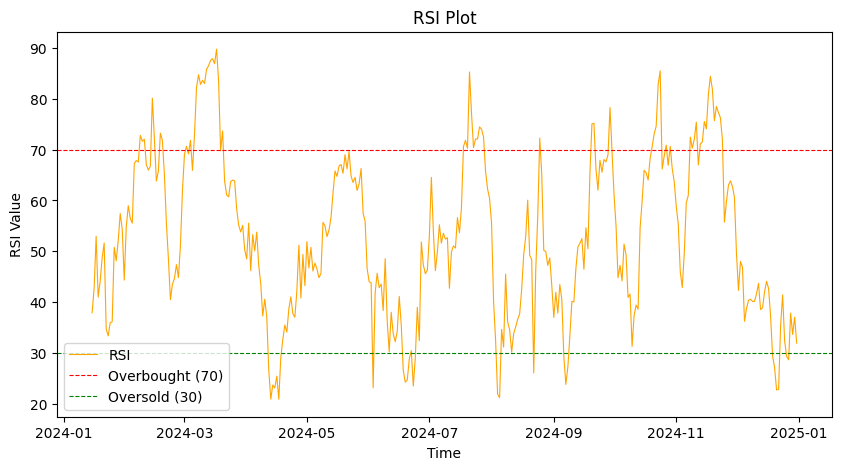

In [9]:

# Plot
plt.figure(figsize=(10,5))
plt.plot(rsi_sol["RSI"], label='RSI', color='orange', linewidth=0.8)
plt.axhline(70, color='red', linestyle='--', label='Overbought (70)', linewidth=0.8)
plt.axhline(30, color='green', linestyle='--', label='Oversold (30)', linewidth=0.8)
plt.title('RSI Plot')
plt.xlabel('Time')
plt.ylabel('RSI Value')
plt.legend()
plt.show()


In [15]:
(rsi_sol["RSI"]>70).value_counts()

False    305
True      61
Name: RSI, dtype: int64

In [11]:
(rsi_sol["RSI"]<30).value_counts()

False    340
True      26
Name: RSI, dtype: int64

Potensi reversal naik

In [18]:
rsi_sol[(rsi_sol["RSI"]<30)]

Price,Close,RSI
Date,,
2024-04-12,153.635468,26.653507
2024-04-13,139.341690,20.964680
2024-04-14,151.284943,23.743934
2024-04-15,138.508621,23.161604
2024-04-16,136.279327,25.480714
2024-04-17,131.866180,20.950850
2024-04-18,142.082397,29.230101
2024-06-03,164.923462,23.205977
2024-06-18,137.503998,26.651746


--Next -- Back test sederhana

Potensi reversal turun

In [19]:
rsi_sol[(rsi_sol["RSI"]>70)]

Price,Close,RSI
Date,,
2024-02-08,102.785637,72.774598
2024-02-09,106.933334,71.632181
2024-02-10,109.131470,72.030741
2024-02-14,116.976326,80.089526
2024-02-15,113.699409,72.261271
...,...,...
2024-11-20,235.423660,75.657691
2024-11-21,257.065887,78.454811
2024-11-22,256.518677,77.291476


**Divergence Sederhana**

In [29]:
rsi_sol['Divergence'] = 0

bullish_divergence = (rsi_sol["Close"] > rsi_sol["Close"].shift(1)) & (rsi_sol["RSI"] < rsi_sol["RSI"].shift(1)) & (rsi_sol['RSI'] < 30)

bearish_divergence = (rsi_sol["Close"] < rsi_sol["Close"].shift(1)) & (rsi_sol["RSI"] > rsi_sol["RSI"].shift(1)) & (rsi_sol['RSI'] > 70)

rsi_sol.loc[bullish_divergence, 'Divergence'] = 1
rsi_sol.loc[bearish_divergence, 'Divergence'] = -1

#alternative code
'''
def detect_divergence(row):
    prev_close = row['Close_shift']
    prev_rsi = row['RSI_shift']
    
    if (row['Close'] > prev_close) and (row['RSI'] < prev_rsi):
        return 1  # Bullish Divergence
    elif (row['Close'] < prev_close) and (row['RSI'] > prev_rsi):
        return -1  # Bearish Divergence
    else:
        return 0  # No Divergence
# Tambahkan kolom shift dulu
rsi_sol['Close_shift'] = rsi_sol['Close'].shift(1)
rsi_sol['RSI_shift'] = rsi_sol['RSI'].shift(1)

# Lalu apply fungsi
rsi_sol['Divergence'] = rsi_sol.apply(detect_divergence, axis=1)*/'''

"\ndef detect_divergence(row):\n    prev_close = row['Close_shift']\n    prev_rsi = row['RSI_shift']\n    \n    if (row['Close'] > prev_close) and (row['RSI'] < prev_rsi):\n        return 1  # Bullish Divergence\n    elif (row['Close'] < prev_close) and (row['RSI'] > prev_rsi):\n        return -1  # Bearish Divergence\n    else:\n        return 0  # No Divergence\n# Tambahkan kolom shift dulu\nrsi_sol['Close_shift'] = rsi_sol['Close'].shift(1)\nrsi_sol['RSI_shift'] = rsi_sol['RSI'].shift(1)\n\n# Lalu apply fungsi\nrsi_sol['Divergence'] = rsi_sol.apply(detect_divergence, axis=1)*/"

In [30]:
len(rsi_sol[(rsi_sol["Divergence"]==1)])

3

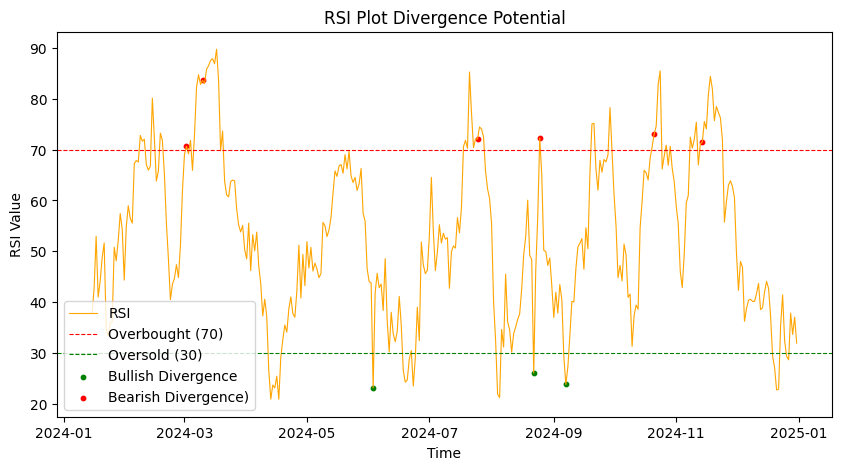

In [31]:
plt.figure(figsize=(10,5))
plt.plot(rsi_sol["RSI"], label='RSI', color='orange', linewidth=0.8)
plt.axhline(70, color='red', linestyle='--', label='Overbought (70)', linewidth=0.8)
plt.axhline(30, color='green', linestyle='--', label='Oversold (30)', linewidth=0.8)

plt.scatter(rsi_sol.index[rsi_sol['Divergence'] == 1], 
            rsi_sol['RSI'][rsi_sol['Divergence'] == 1],
            marker='o', color='green', label='Bullish Divergence', s=10)

# Plot sinyal jual (SHORT) 
plt.scatter(rsi_sol.index[rsi_sol['Divergence'] == -1], 
            rsi_sol['RSI'][rsi_sol['Divergence'] == -1],
            marker='o', color='red', label='Bearish Divergence)', s=10)

plt.title('RSI Plot Divergence Potential')
plt.xlabel('Time')
plt.ylabel('RSI Value')
plt.legend()
plt.show()

